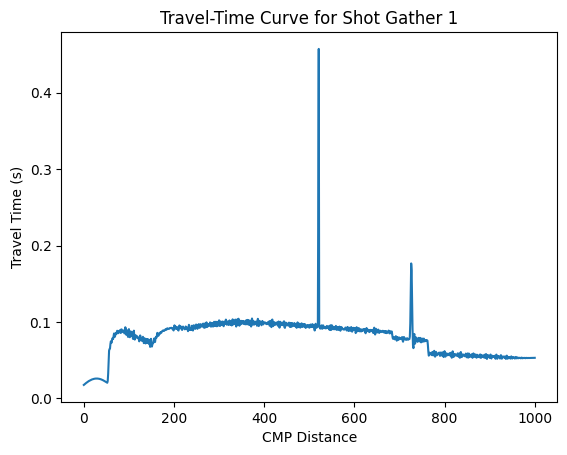

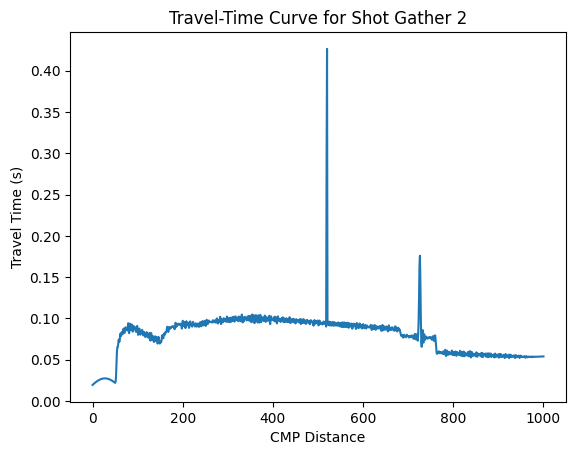

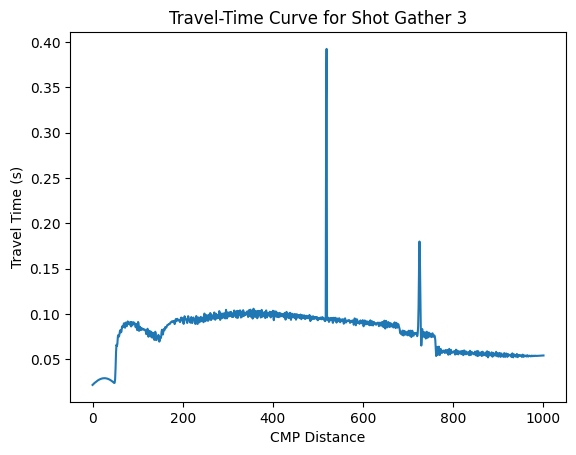

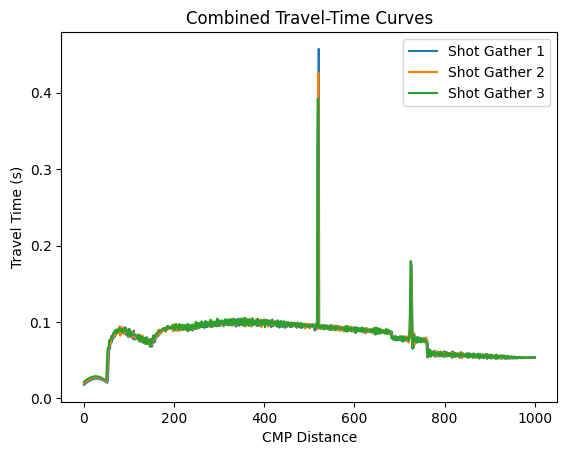

Velocities: [19007.946694874387, 19103.432810357248, 19491.651996409055, 20959.997657497926, 23181.2832414741, 22378.213669759236, 20429.401537680573, 23280.37336152654, 27505.80101377044, 23938.44846252583, 24234.41735656908, 31217.09952442861, 29859.583867732224, 27699.787688814464, 34660.22490263495, 38048.23835590731, 34986.699086537206, 40340.592482841115, 48885.69135690538, 48961.09177479827, 52781.392663830964, 65976.3169419723, 77324.12891436924, 85150.06794239767, 107561.59446112934, 158195.9828261847, 233779.0031095081, 399325.4431376996, -29330801.84870485, -369491.06455055973, -211527.33335294787, -148956.84940298923, -108181.38586608855, -85465.22181462676, -73186.21540334861, -63575.744172727966, -55042.52366966007, -49014.48376235296, -44890.27731843303, -41111.08823940383, -37606.64282012116, -34986.992498389016, -32969.17795759278, -30984.27080481825, -29154.275901010114, -27759.044285709395, -26591.045814624264, -25402.96568770065, -24335.025635233997, -23515.35782662

In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Load the data
data = scipy.io.loadmat('data.mat')
dt = data['dt'][0][0]
dx = data['dx'][0][0]
rawsection = data['rawsection']

# Plot the travel-time curves for each shot gather separately
for i in range(3):
    plt.figure()
    plt.plot(rawsection[:, i])
    plt.title(f'Travel-Time Curve for Shot Gather {i+1}')
    plt.xlabel('CMP Distance')
    plt.ylabel('Travel Time (s)')
    plt.show()

# Combine the travel-time curves into a single plot
plt.figure()
for i in range(3):
    plt.plot(rawsection[:, i], label=f'Shot Gather {i+1}')
plt.title('Combined Travel-Time Curves')
plt.xlabel('CMP Distance')
plt.ylabel('Travel Time (s)')
plt.legend()
plt.show()

# Function to calculate velocity and thickness using Snell's Law
def calculate_velocity_thickness_snell(travel_times, dx):
    velocities = []
    thicknesses = []
    for i in range(len(travel_times) - 1):
        dt = travel_times[i+1] - travel_times[i]
        velocity = dx / dt
        thickness = (travel_times[i+1] + travel_times[i]) / 2 * velocity
        velocities.append(velocity)
        thicknesses.append(thickness)
    return velocities, thicknesses

# Example calculation for one shot gather
travel_times = rawsection[:, 0]  # Replace with actual travel times
velocities, thicknesses = calculate_velocity_thickness_snell(travel_times, dx)

print("Velocities:", velocities)
print("Thicknesses:", thicknesses)
